In [1]:
292701

292701

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score

# Tarefa 4 - Decision Trees, Random Forest and K-Means
Fourth assessed coursework for the course: Técnicas e Algoritmos em Ciência de Dados

This tarefa provides an exciting opportunity for students to put their knowledge acquired in class into practice, using decision trees and random forests to solve a real-world problem in classification and delve into the world of unsupervised learning by implementing the K-means algorithm. Students will also get used to generating important plots during training to analyse the models' behaviour. 

## General guidelines:

* This work must be entirely original. You are allowed to research documentation for specific libraries, but copying solutions from the internet or your classmates is strictly prohibited. Any such actions will result in a deduction of points for the coursework.
* Before submitting your work, make sure to rename the file to the random number that you created for the previous coursework (for example, 289479.ipynb).

## Notebook Overview:

1. [Decision Trees](#Decision_Trees) (30%)
2. [Random Forest](#Random_Forest) (30%)
3. [K-Means](#K-Means) (30%)

### Decision_Trees
## Part 1 - Decision Trees for Classification (value: 30%)

In [3]:
# load the data
ddi_df = pd.read_csv('ddi_dt_sample.csv') # don't forget to change the path

In [4]:
# inspect the data
ddi_df

,drug1,drug2,ddi,pca_max_0,pca_max_1,pca_max_2,pca_max_3,pca_max_4,pca_max_5,pca_max_6,...,pca_min_17,pca_min_18,pca_min_19,pca_min_20,pca_min_21,pca_min_22,pca_min_23,pca_min_24,pca_min_25,pca_min_26
0,CID000002725,CID000013342,0.0,-2.383210,-0.066904,0.051153,0.058145,0.398508,0.215271,-0.267814,...,-0.366350,-1.091191,-1.021989,-0.086979,-0.326333,-0.179530,-0.162906,-0.204593,-0.091330,-0.195522
1,CID000002802,CID000013342,0.0,-2.554958,-0.066904,0.053715,0.058145,0.398508,0.131852,-0.267814,...,-0.366350,0.106596,0.010149,-0.086979,-0.326333,-0.179530,-0.162906,-0.204593,-0.080100,-0.195522
2,CID000002083,CID000013342,0.0,9.908402,-0.066904,0.122384,0.058145,0.398508,0.098734,0.041276,...,-0.366350,0.102901,0.010149,-0.088365,-0.326333,-0.179530,-0.162906,-0.204593,-0.080100,-0.195522
3,CID000004034,CID000013342,0.0,-2.547375,-0.066904,0.051884,0.058145,0.398508,0.203962,-0.267814,...,-0.366350,-1.011102,-0.944133,-0.086979,-0.326333,-0.179530,-0.162906,-0.204593,-0.080100,-0.195522
4,CID000003899,CID000013342,0.0,-2.554958,-0.066904,0.051083,0.058145,0.398508,0.138126,-0.267814,...,-0.366350,0.075010,0.010149,-0.086979,-0.326333,-0.179530,-0.162906,-0.204593,-0.080100,-0.195522
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
775,CID000002083,CID000002160,1.0,10.213277,-0.355555,0.122384,0.024324,0.144197,0.286870,0.041276,...,-0.743211,-0.148822,0.030291,-0.088365,-0.131963,0.010439,0.014404,-0.130975,0.003776,-0.043334
776,CID000002088,CID000002160,1.0,10.213277,-0.355555,0.048850,-0.064623,0.097114,0.286870,-0.235796,...,-0.743211,-0.148822,0.041925,-0.106078,-0.131963,0.157741,-0.055455,-0.130975,-0.030832,-0.053976
777,CID000001206,CID000002160,0.0,10.213277,-0.355555,-0.210680,-0.646083,-0.111940,0.290024,-0.235796,...,-1.269156,-0.148822,0.259326,-0.247741,-0.193907,0.076300,0.023777,-0.130975,0.006320,-0.070912
778,CID000002118,CID000002160,1.0,10.213277,-0.355555,0.062143,-0.017338,0.059182,0.286870,-0.235796,...,-0.743211,-0.148822,0.059779,-0.072749,-0.131963,0.077367,0.026625,-0.130975,-0.021027,-0.047147


As you can observe, the first 2 columns represent the IDs of the drugs in each combination. The 3rd column represents the binary label indicating if the pair causes an adverse interaction or not. The remaining 54 columns are the features based on the PCA representations of individual drug targets. 

In [5]:
## your code goes here:
# Start spliting the data
random_state = 0
X_ddi = ddi_df.values[:,3:]
y_ddi = ddi_df.values[:,2]
X_ddi_train, X_ddi_test, y_ddi_train, y_ddi_test = train_test_split(X_ddi, y_ddi, test_size=0.1, random_state=random_state)
# Make y vectors being 1 dimensional
y_ddi_train = y_ddi_train.reshape(-1, 1)
y_ddi_test = y_ddi_test.reshape(-1, 1)

In [6]:
# Let's reuse the code from lab 06 but with some diferences to calculate the entropy
def entropy(y:np.ndarray) -> float:
    entropy = 0
    # Get the entropy for each class
    for classe in np.unique(y):
        proporcao = np.size(y[y==classe])/len(y)
        entropy += proporcao * np.log2(proporcao)

    return -entropy

def split_region(region:np.ndarray, feature_index:int, tau:float) -> tuple[np.ndarray]:
    feature = region[:,feature_index]
    # Split the region based on tau
    left_partition = np.where(feature < tau)[0]
    right_partition = np.where(feature >= tau)[0]

    return left_partition, right_partition

def info_gain(y:np.ndarray, left_split:np.ndarray, right_split:np.ndarray) -> float:
    # Start entropy
    start_entropy = entropy(y)
    
    entropy_left = entropy(y[left_split])
    size_left = len(left_split) / len(y)
    
    entropy_right = entropy(y[right_split])
    size_right = len(right_split) / len(y)
    # Final Entropy
    final_entropy = size_left * entropy_left + size_right * entropy_right
    
    # Info gain
    return start_entropy - final_entropy

def get_split(X: np.ndarray, y: np.ndarray) -> dict:
    feature_index = 0
    best_tau = 0
    best_gain = float("-inf")
    left_region = np.array([])
    right_region = np.array([])

    for col in range(X.shape[1]):
        # Get the taus for make a split
        taus = np.unique(X[:, col])

        for tau in taus:
            # Get the splits in each column and tau
            left_split, right_split = split_region(X, col, tau)
            if len(left_split) == 0 or len(right_split) == 0:
                continue
            # Select the best split
            current_gain = info_gain(y, left_split, right_split)
            if current_gain > best_gain:
                feature_index = col
                best_tau = tau
                best_gain = current_gain
                left_region = left_split
                right_region = right_split

    return {"feature_index": feature_index, "tau": best_tau, "left_region": left_region, "right_region": right_region}

In [7]:
# Then let's implement the recursive growth
def train_tree(X:np.ndarray, y:np.ndarray, node:dict, min_samples:int, max_depth:int, current_depth:int=0) -> None:
    if len(y) <= min_samples or current_depth >= max_depth or entropy(y) == 0:
        node["value"] = np.mean(y)
        return
    # Start getting the split
    split = get_split(X, y)
    left_region = split["left_region"]
    right_region = split["right_region"]

    if len(left_region) == 0 or len(right_region) == 0:
        node["value"] = np.mean(y)
        return

    node["feature_index"] = split["feature_index"]
    node["tau"] = split["tau"]
    node["left"] = {}
    node["right"] = {}
    current_depth += 1
    # And spliting for the left and right sides
    train_tree(X[left_region], y[left_region], node["left"], min_samples, max_depth, current_depth)
    train_tree(X[right_region], y[right_region], node["right"], min_samples, max_depth, current_depth)

def create_tree(X:np.ndarray, y:np.ndarray, min_samples:int, max_depth:int) -> None:
    node = dict()
    train_tree(X, y, node, min_samples, max_depth)
    return node

def predict_sample(node:dict, sample:np.ndarray) -> float:
    if "value" in node:
        return node["value"]
    
    feature_index = node["feature_index"]
    tau = node["tau"]
    # Make a recursivelly predict
    if sample[feature_index] < tau:
        return predict_sample(node["left"], sample)
    else:
        return predict_sample(node["right"], sample)
        
def predict(node:dict, X:np.ndarray) -> np.ndarray:
    # Get the predict for each x_sample
    predictions = list()
    for i in range(len(X)):
        x_sample = X[i, :]
        predictions.append(predict_sample(node, x_sample))
    y_pred = np.array(predictions).reshape(-1, 1)
    
    y_pred = y_pred >= 0.5

    return y_pred.astype(int)

def get_accuracy_tree(tree:dict, X:np.ndarray, y:np.ndarray) -> float:
    predictions = predict(tree, X)
    accuracy = np.sum(predictions.astype(int) == y.astype(int))/len(y)
    return accuracy

In [8]:
def cross_validation(X_train:np.ndarray, y_train:np.ndarray, min_samples:int, max_depth:int, n_splits=3):
    indices = np.arange(len(X_train))
    np.random.shuffle(indices)

    fold_indices = np.array_split(indices, n_splits)

    accuracies = list()
    aurocs = list()
    # Do a cross validation on the train data and return the averages of the auroc and accuracy
    for i in range(n_splits):
        val_indices = fold_indices[i]
        train_indices = np.concatenate([fold_indices[j] for j in range(n_splits) if j != i])

        X_train_fold, X_val_fold = X_train[train_indices], X_train[val_indices]
        y_train_fold, y_val_fold = y_train[train_indices].reshape(-1, 1), y_train[val_indices].reshape(-1, 1)

        tree = create_tree(X_train_fold, y_train_fold, min_samples, max_depth)

        y_pred_val = predict(tree, X_val_fold)

        accuracy_fold = get_accuracy_tree(tree, X_val_fold, y_val_fold)
        auroc_fold = roc_auc_score(y_val_fold.astype(int), y_pred_val.astype(int))

        accuracies.append(accuracy_fold)
        aurocs.append(auroc_fold)

    avg_accuracy = sum(accuracies) / len(accuracies)
    avg_auroc = sum(aurocs) / len(aurocs)

    return avg_accuracy, avg_auroc

min_samples = 15
max_depths = [4, 6, 8]
best_depth = None
best_auroc = 0

for depth in max_depths:
    avg_accuracy, avg_auroc = cross_validation(X_ddi_train, y_ddi_train, min_samples, depth)
    
    if avg_auroc > best_auroc:
        best_auroc = avg_accuracy
        best_depth = depth

    print(f"Accuracy for depth {depth}: {avg_accuracy}")
    print(f"AUROC for depth {depth}: {avg_auroc}")

Accuracy for depth 4: 0.7621082621082621
AUROC for depth 4: 0.7732602852605616
Accuracy for depth 6: 0.7207977207977208
AUROC for depth 6: 0.7276229114873951
Accuracy for depth 8: 0.7606837606837606
AUROC for depth 8: 0.7676610410631265


In [9]:
tree = create_tree(X_ddi_train, y_ddi_train, min_samples, best_depth)

y_pred_test = predict(tree, X_ddi_test)

accuracy_test = get_accuracy_tree(tree, X_ddi_test, y_ddi_test)
auroc_test = roc_auc_score(y_ddi_test.astype(int), y_pred_test.astype(int))

print("Test set Accuracy:", accuracy_test)
print("Test set AUROC:", auroc_test)

Test set Accuracy: 0.8076923076923077
Test set AUROC: 0.7989130434782609


## Random_Forest
## Part 2 - Random Forest for Classification Networks (value: 30%)



In [10]:
## your code goes here:
X_ddi_train, X_ddi_tv, y_ddi_train, y_ddi_tv = train_test_split(X_ddi, y_ddi, test_size=0.2, random_state=random_state)
X_ddi_val, X_ddi_test, y_ddi_val, y_ddi_test = train_test_split(X_ddi_tv, y_ddi_tv, test_size=0.5, random_state=random_state)

y_ddi_train, y_ddi_val, y_ddi_test = y_ddi_train.reshape(-1, 1), y_ddi_val.reshape(-1, 1), y_ddi_test.reshape(-1, 1)

In [11]:
def bootstrap(X:np.ndarray, num_bags:int=10) -> list:
    # Start with the bootstrat
    rng = np.random.default_rng(0)
    samples = len(X)
    bags = list()

    for bag in range(num_bags):
        indices = rng.choice(samples, size=samples, replace=True)
        bags.append(indices)

    return bags

def aggregate_classification(preds:list[np.ndarray]) -> np.ndarray:
    # Get the forest prediction based on each tree prediction
    sum_preds = np.zeros_like(preds[0])

    for pred in preds:
        sum_preds += pred
    
    y_pred = sum_preds/len(preds)
    y_pred = y_pred >= 0.5

    return y_pred.astype(int)

def create_random_forest(X:np.ndarray, y:np.ndarray, num_features:int, min_samples:int, max_depth:int, num_estimators:int) -> list:
    forest = list()
    bags = bootstrap(X, num_estimators)
    
    for indices in bags:
        # Shuffle the indices and select some features
        X_sample = X[indices]
        y_sample = y[indices]
        features = np.random.choice(X.shape[1], num_features, replace=False)
        # Create the trees and apeend to the forest
        X_sample = X_sample[:, features]
        tree = create_tree(X_sample, y_sample, min_samples, max_depth)
        
        forest.append((tree, features))
    
    return forest

def predict_random_forest(X:np.ndarray, forest:list) -> np.ndarray:
    predictions = []
    # Predit the answers based on each tree and features
    for tree, features in forest:
        pred = predict(tree, X[:, features])
        predictions.append(pred)
    
    return aggregate_classification(predictions)

def accuracy_pred(y_true:np.ndarray, y_pred:np.ndarray) -> float:
    accuracy = np.sum(y_true.astype(int) == y_pred.astype(int))/len(y_true)
    return accuracy

In [12]:
num_features = [5, 6]
min_samples = 15
max_depth = [7, 8]
num_estimators = 30

best_auroc = 0
best_depth_2 = None
best_features = None

for each_feature in num_features:
    for each_depth in max_depth:
        forest = create_random_forest(X_ddi_train, y_ddi_train, each_feature, min_samples, each_depth, num_estimators)

        y_val_pred = predict_random_forest(X_ddi_val, forest)
        current_auroc = roc_auc_score(y_ddi_val.astype(int), y_val_pred.astype(int))
        current_accuracy = accuracy_pred(y_ddi_val, y_val_pred)

        print(f"Auroc on depth {each_depth} and num features {each_feature}: {current_auroc}")
        print(f"Accuracy on depth {each_depth} and num features {each_feature}: {current_accuracy}")

        if current_auroc > best_auroc:
            best_auroc = current_auroc
            best_depth_2 = each_depth
            best_features = each_feature

Auroc on depth 7 and num features 5: 0.8122855181880576
Accuracy on depth 7 and num features 5: 0.8333333333333334
Auroc on depth 8 and num features 5: 0.8177762525737817
Accuracy on depth 8 and num features 5: 0.8333333333333334
Auroc on depth 7 and num features 6: 0.8016472203157172
Accuracy on depth 7 and num features 6: 0.8205128205128205
Auroc on depth 8 and num features 6: 0.8177762525737817
Accuracy on depth 8 and num features 6: 0.8333333333333334


In [13]:
X_ddi_trainv = np.concatenate([X_ddi_train, X_ddi_val])
y_ddi_trainv = np.concatenate([y_ddi_train, y_ddi_val])

final_forest = create_random_forest(X_ddi_trainv, y_ddi_trainv, best_features, min_samples, best_depth_2, num_estimators)

y_test_pred = predict_random_forest(X_ddi_test, final_forest)
current_auroc = roc_auc_score(y_ddi_test.astype(int), y_test_pred.astype(int))
current_accuracy = accuracy_pred(y_ddi_test, y_test_pred)

print(f"Auroc on test set: {current_auroc}")
print(f"Accuracy on test set: {current_accuracy}")

Auroc on test set: 0.8968253968253969
Accuracy on test set: 0.8974358974358975


## K-Means
## Part 3 – Clustering with K-means (value: 40%)

In this exercise, you will explore clustering by implementing the K-means algorithm. You will write code to perform K-means clustering while visualizing the movement of the centroids at each iteration. 

To complete this exercise, you will write code to implement K-means for clustering: 

1. Dataset Preparation: Run the cells provided in the notebook that generate the artificial data points for this exercise.
2. K-means Clustering:
	- Initialize K cluster centroids by selecting K points from your dataset at random.
	- Implement a loop to perform the following steps until convergence (or until a specified maximum number of iterations is reached, e.g., 150):
        - Assign each data point to the nearest centroid (you will have to calculate the Euclidean distance between the data point and each centroid).
        - Update each centroid by moving it to the mean of all data points assigned to it.
        - Check for convergence by comparing the new centroids with the previous centroids. If the difference is smaller than an $\epsilon=1^{-4}$, exit the loop.
3. Centroid Movement Visualization:
	- At 5 different moments during training, plot a figure showing the centroids and the points. Figure 1 should show the situation at the beginning, before learning. Figure 5 should show the situation at the end of the learning. The remaining Figures 2-4 should show intermediary situations.
	- For each figure, each centroid will be represented by a large black cross and each cluster with a different colour, the points must be coloured according to their respective cluster.
4. Sum of squared distances:
	- Along with plotting the centroid movement, calculate the sum of squared distances at each iteration as follows:
        - $\sum_{j=1}^K \sum_{n \in S_j}d(x_n,\mu_j )^2$, where $K$ is the number of clusters, $x_n$ represents the $n^{th}$ datapoint, $n \in S_j$ indicates a set of points that belong to cluster $S_j$, $\mu_j$ is the mean of the datapoints in $S_j$ and $d(x_n,\mu_j)$ indicates the Euclidean distance between $x_n$ and $\mu_j$.
	- Make a plot of the sum of squared distances at each iteration. 


In [14]:
# Generate artificial data points
np.random.seed(13)
num_samples = 200
num_features = 2
X = np.random.randn(num_samples, num_features) * 1.5 + np.array([[2, 2]])
X = np.concatenate([X, np.random.randn(num_samples, num_features) * 3 + np.array([[-5, -5]])])
X = np.concatenate([X, np.random.randn(num_samples, num_features) * 2 + np.array([[7, -5]])])

In [15]:
def sse(x1: np.ndarray, x2: np.ndarray) -> float:
    # Get the sse distance
    return np.sum((x1 - x2) ** 2)

def initialize_centroids(X, n_clusters):
    # Initializate centroids with random samples
    indices = np.random.choice(len(X), n_clusters, replace=False)
    return X[indices]

def get_labels(X: np.ndarray, centroids: np.ndarray) -> tuple[np.ndarray, float]:
    labels = np.zeros(len(X), dtype=int)
    sse_total = 0
    # Assign the less distant centroid to each datapoint
    for i in range(len(X)):
        best_distance = np.inf
        for j in range(len(centroids)):

            dist = sse(X[i], centroids[j])

            if dist < best_distance:
                best_distance = dist
                labels[i] = j

        sse_total += best_distance

    return labels, sse_total

def plot_clusters(X, centroids, labels, iteration):
    # Plot the data and centroids
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=labels, palette=['blue', 'red', 'green'], s=50)
    plt.legend(labels=['Cluster 1', 'Cluster 2', 'Cluster 3'])
    sns.scatterplot(x=centroids[:, 0], y=centroids[:, 1], color='black', marker='X', s=200, legend=False)
    plt.title(f'Iteration {iteration}')
    plt.show()

def plot_sse_history(sse_history):
    # Plot the sse history
    plt.figure(figsize=(8, 6))
    plt.plot(range(1, len(sse_history)+1), sse_history, marker='o')
    plt.title('SSE History')
    plt.xlabel('Iteration')
    plt.ylabel('Sum of Squared Errors (SSE)')
    plt.show()

def k_means_train(X: np.ndarray, centroids_num: int, epochs: int = 150) -> tuple[np.ndarray, np.ndarray, list]:
    epsilon = 1e-4
    # Initialize the centroids
    centroids = initialize_centroids(X, centroids_num)
    sse_history = []

    for epoch in range(epochs):
        # Get the labels
        labels, sse_current = get_labels(X, centroids)
        sse_history.append(sse_current)

        new_centroids = np.zeros_like(centroids)
        # Update the centroids based on each label
        for j in range(len(centroids)):
            indexes = np.where(labels == j)[0]
            if len(indexes) > 0:
                new_centroids[j] = np.mean(X[indexes], axis=0)
            else:
                new_centroids[j] = centroids[j]

        # Check the convergence
        if np.sqrt(sse(new_centroids, centroids)) < epsilon:
            centroids = new_centroids
            break

        centroids = new_centroids

        # Plot clusters
        if epoch < 4:
            plot_clusters(X, centroids, labels, epoch + 1)

    # Plot clusters on final iteration
    plot_clusters(X, centroids, labels, epoch + 1)
    
    # Plot sse history
    plot_sse_history(sse_history)

    return centroids, labels, sse_history

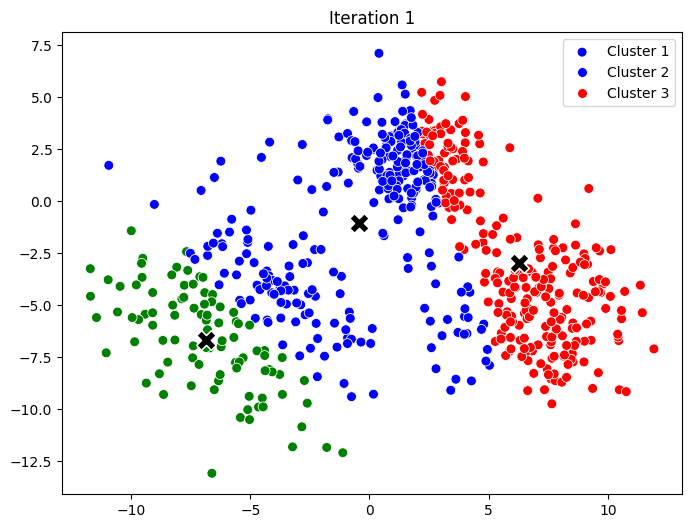

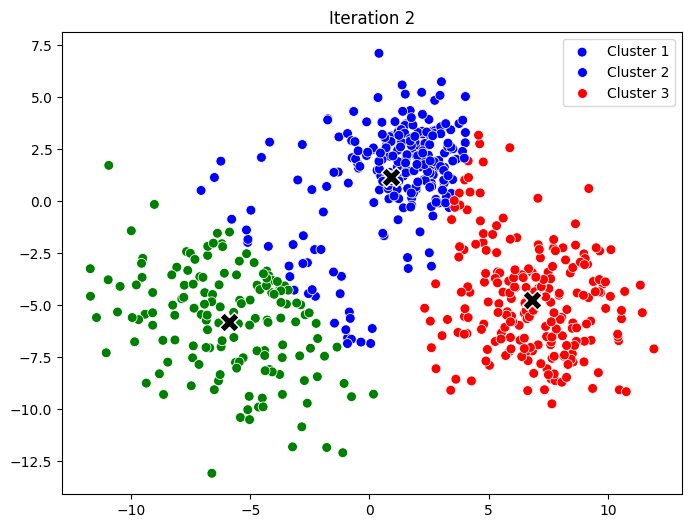

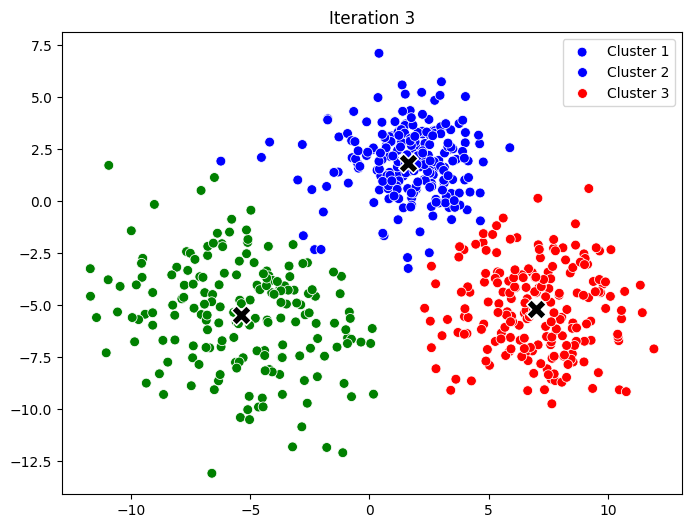

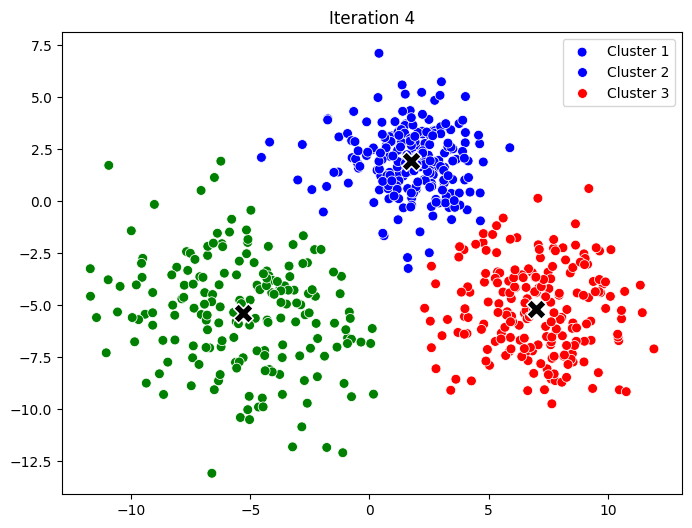

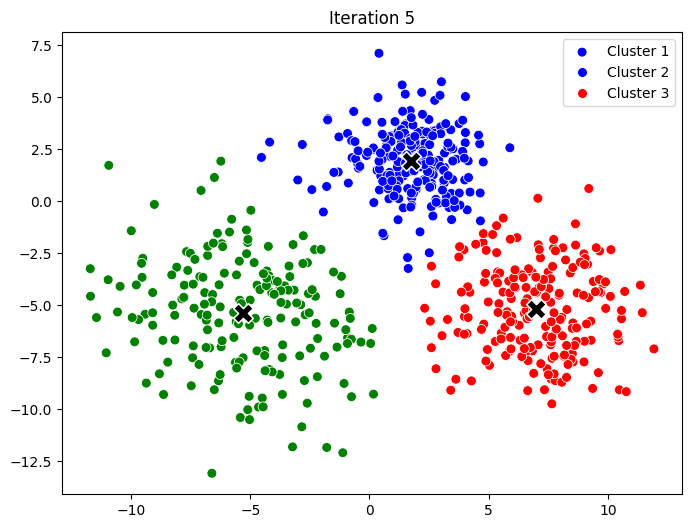

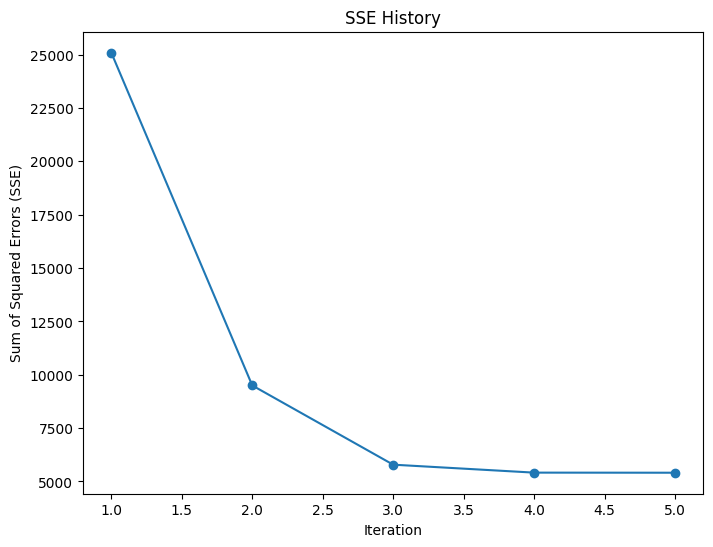

In [16]:
centroids, labels, sse_history = k_means_train(X, 3, 150)